In [1]:
import usit.p

from useful_scit.imps2.defs import (
    pd, np, xr, za, mpl, sns, os, glob, 
    dt, sys, crt, Path, pprint, ucp, log, pjoin, plt
)
from useful_scit.imps2.defs import *

import os 
import glob
import sys
import pprint
import datetime as dt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt 
import xarray as xr 
import seaborn as sns
import cartopy as crt



In [2]:
from useful_scit.imps2.defs import *

In [5]:
d1 = xr.open_dataarray('../banana_inspector/data_example/nais_chc_data.nc')
d2 = xr.open_dataarray('../banana_inspector/data_example/smps_chc_data.nc')

In [6]:
d1

<xarray.DataArray 'dndlDp' (secs: 51906, lDp: 36)>
[1868616 values with dtype=float64]
Coordinates:
  * secs     (secs) float64 1.512e+09 1.512e+09 ... 1.528e+09 1.528e+09
  * lDp      (lDp) float64 -8.95 -8.9 -8.85 -8.8 -8.75 ... -7.35 -7.3 -7.25 -7.2
    time     (secs) datetime64[ns] ...
    Dp       (lDp) float64 ...

In [155]:
y1 = np.log10(10e-9)
cor = 'lDp'

def is_regular_grid(coor,tolerance_percentage = 1 ):

    from xarray.plot.plot import _infer_interval_breaks as infer_interval_breaks
    
    tol = tolerance_percentage/100

    bks = infer_interval_breaks(coor,check_monotonic=True)

    d = pd.Series(bks).diff()

    n = d/np.mean(d)
    m = np.abs(n-1)

    bo = (m > tol).sum()==0
    
#     print(tol)

    return bo

assert is_regular_grid(d1['lDp'])
assert is_regular_grid(d2['lDp'])
assert is_regular_grid(d1['secs'])
assert is_regular_grid(d2['secs'])

assert (d1['secs'] - d2['secs']).sum().item() ==0

d11 = d1.loc[{cor:slice(None,y1)}]
d22 = d2.loc[{cor:slice(y1,None)}]

d3 = xr.concat([d11,d22],cor)

assert is_regular_grid(d3['lDp'])
assert is_regular_grid(d3['secs'])

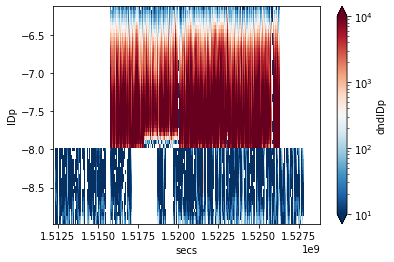

In [156]:
d3.plot(x='secs',norm = mpl.colors.LogNorm(vmin=10,vmax=10000))

In [249]:
import banana_inspector.nodes.CombineSpectraNode as bb

In [254]:
d3,d22,d11 = bb.CombineSpectra.combine_2_spectras(d1,d2,'lDp',-7.94)

In [255]:
d22[cor].min()

<xarray.DataArray 'lDp' ()>
array(-7.9)

In [256]:
d11[cor].max()

<xarray.DataArray 'lDp' ()>
array(-7.95)

In [257]:
assert is_regular_grid(d3['lDp'])

In [258]:
d11[cor].max().item()

-7.950000000000132

In [234]:
last

-7.950000000000132